In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = sns.load_dataset('diamonds')

In [4]:
print(data.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


## 1. Data Preprocessing

In [5]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [6]:
# Encode categorical variables for easier aggregation and analysis
data['cut'] = pd.Categorical(data['cut'])
data['color'] = pd.Categorical(data['color'])
data['clarity'] = pd.Categorical(data['clarity'])

## 2. Exploratory Data Analysis (EDA)

In [7]:
# Statistical summary
print("\nStatistical summary:\n", data.describe())


Statistical summary:
               carat         depth         table         price             x   
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  \
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.

In [8]:
# Aggregate statistics by cut, color, and clarity
print("\nAverage Price by Cut:\n", data.groupby('cut')['price'].mean())
print("\nAverage Price by Color:\n", data.groupby('color')['price'].mean())
print("\nAverage Price by Clarity:\n", data.groupby('clarity')['price'].mean())


Average Price by Cut:
 cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64

Average Price by Color:
 color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

Average Price by Clarity:
 clarity
IF      2864.839106
VVS1    2523.114637
VVS2    3283.737071
VS1     3839.455391
VS2     3924.989395
SI1     3996.001148
SI2     5063.028606
I1      3924.168691
Name: price, dtype: float64


## 3. Visualization

In [9]:
# Calculate the correlation matrix for numeric columns only
numeric_data = data.select_dtypes(include=['float64', 'int64'])
print("\nCorrelation Matrix:\n", numeric_data.corr())


Correlation Matrix:
           carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


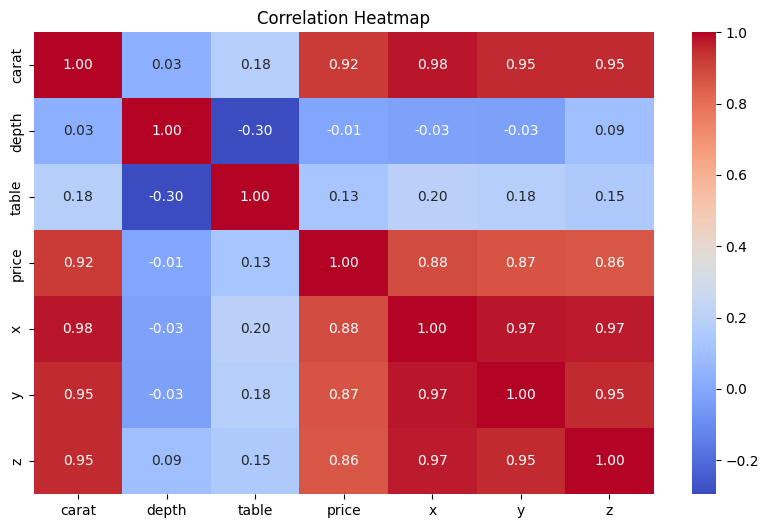

In [10]:
# Visualize correlation heatmap for numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

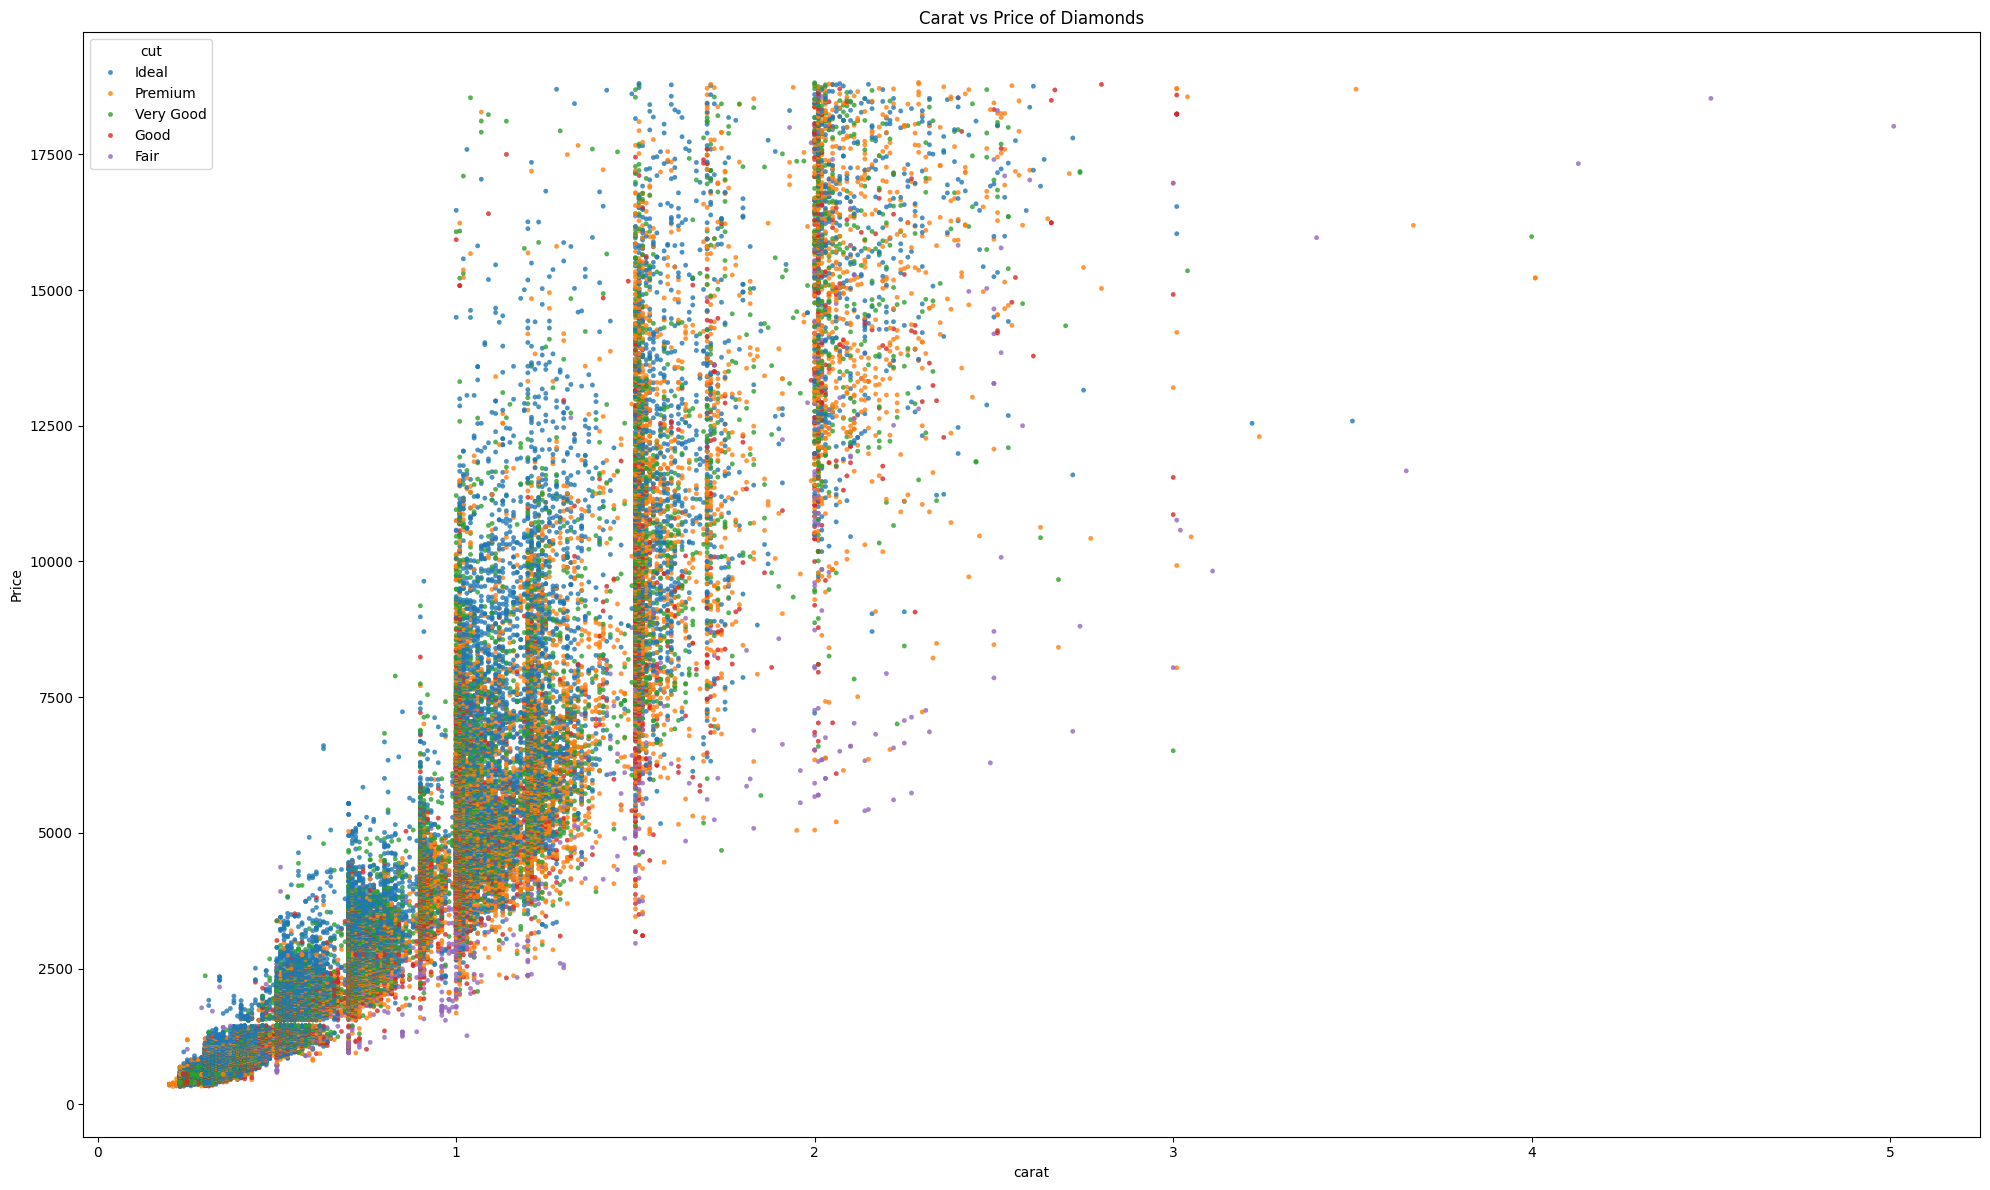

In [29]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='carat', y='price', hue='cut', data=data,s=10,edgecolor=None,alpha=0.8 )
plt.title('Carat vs Price of Diamonds')
plt.xlabel('carat')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_22664\1294694373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cut', y='price', palette='pastel')


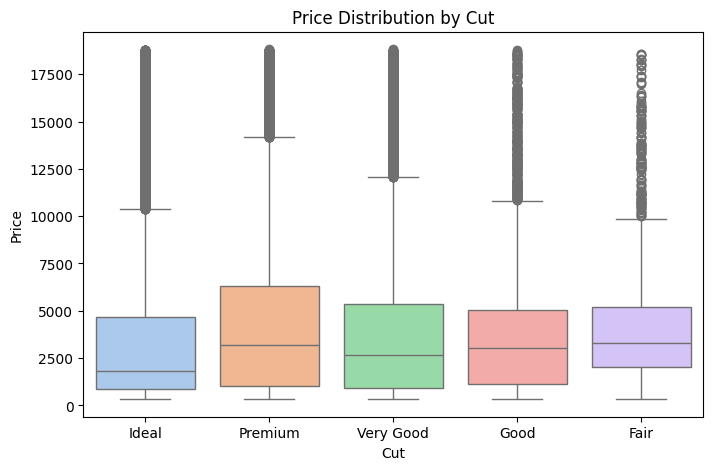

In [20]:
# Box plot of price by cut
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='cut', y='price', palette='pastel')
plt.title("Price Distribution by Cut")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

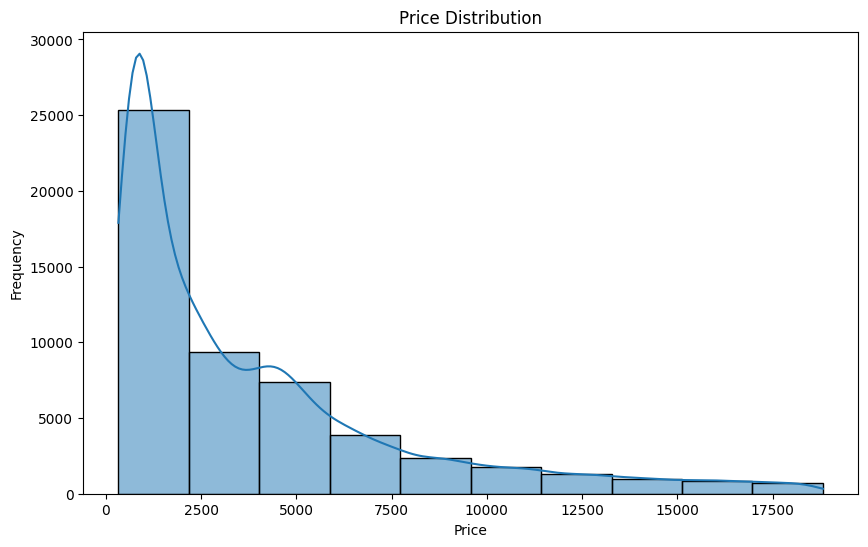

In [23]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=10, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()